In [1]:
import pickle
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import tensornetwork as tn


In [2]:
tn.set_default_backend('pytorch')

In [3]:
%pip install umap-learn


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
from utilities import create_train_test_dataset
x_train, y_train, x_test, y_test = create_train_test_dataset()

# t-SNE

## t-SNE ($\chi = 10$)

2024-07-10 11:22:39,581 - elm_mps - INFO - predict
2024-07-10 11:22:53,256 - elm_mps - INFO - predict
2024-07-10 11:23:06,934 - elm_mps - INFO - predict
2024-07-10 11:23:20,175 - elm_mps - INFO - predict
2024-07-10 11:23:33,484 - elm_mps - INFO - predict
2024-07-10 11:23:46,714 - elm_mps - INFO - predict
2024-07-10 11:23:59,917 - elm_mps - INFO - predict


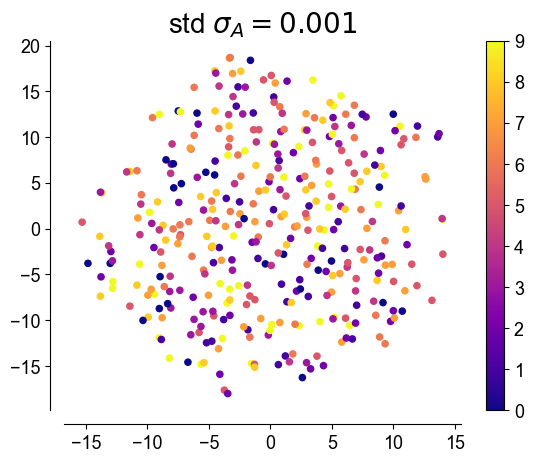

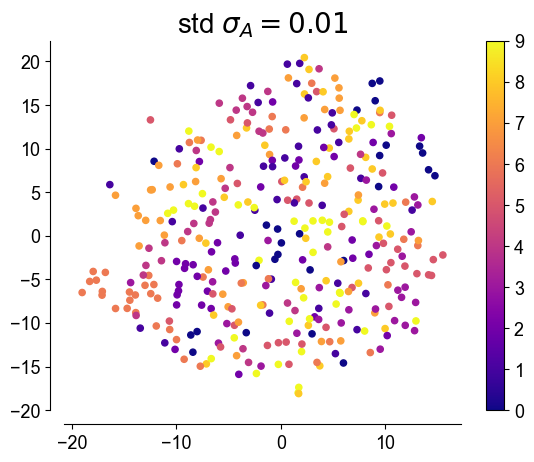

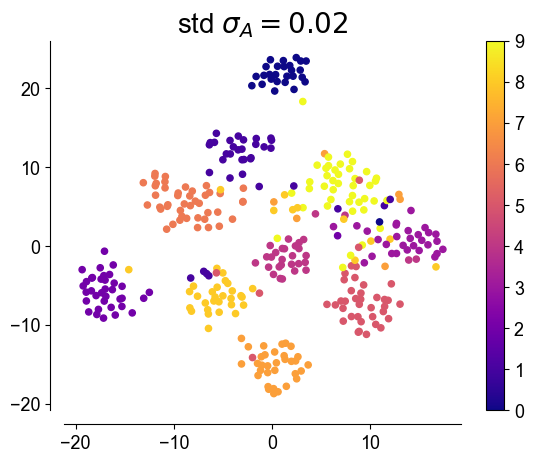

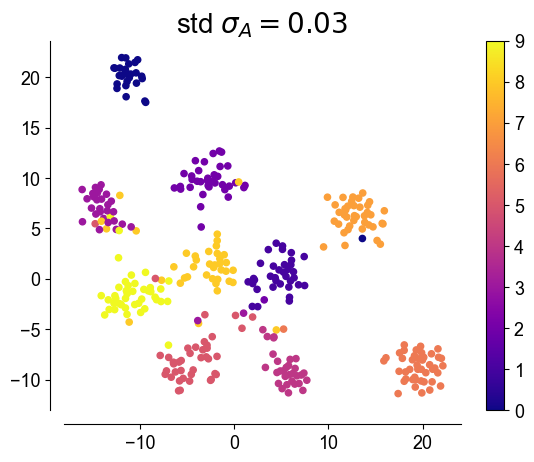

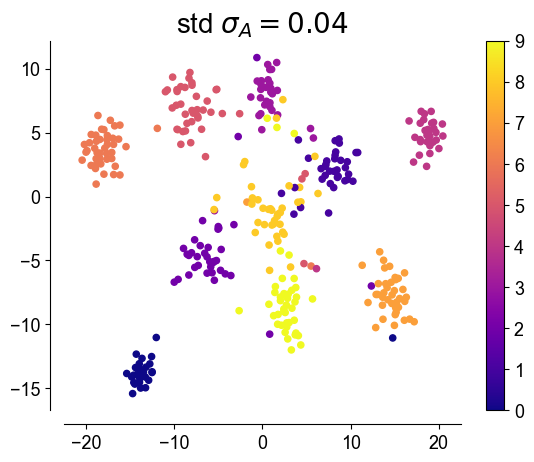

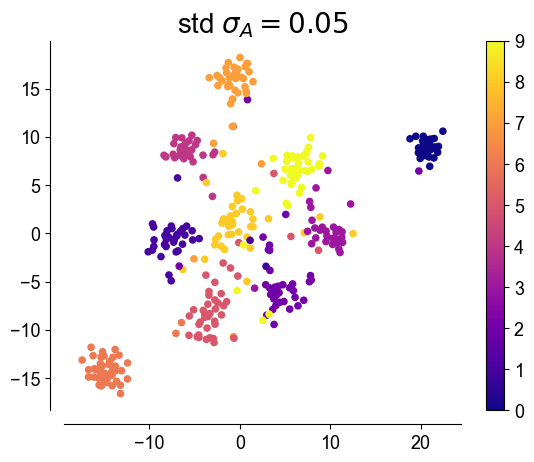

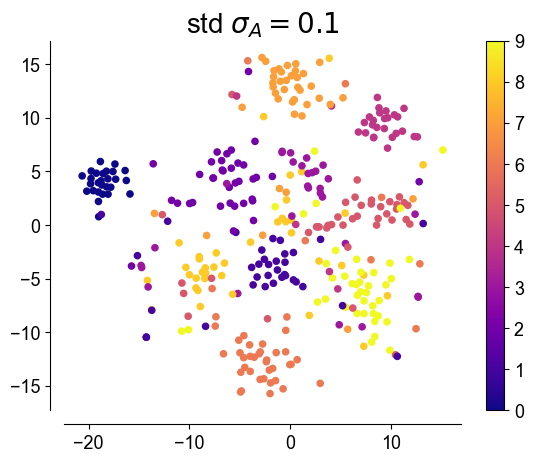

In [9]:
import matplotlib.cm as cm
bond = 10
stds = [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1]
seed = 0
for std in stds:
    model_file = f'results/training_model/{bond}_{std}_{seed}.pickle'
    with open(model_file, 'rb') as file:
        elm = pickle.load(file)
    y_predict = elm.predict(x_test).cpu()
    y_label = y_test.argmax(axis = 1)

    tsne = TSNE(n_components=2, random_state=42)
    compressed_data = tsne.fit_transform(y_predict)
    plt.figure()
    plt.title(f'std $\sigma_A={std}$', size=20)
    plt.scatter(compressed_data[:, 0], compressed_data[:, 1], c = y_label, s = 20, facecolor='None', cmap='plasma')
    cb = plt.colorbar()

    cb.ax.tick_params(labelsize=13)
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.tick_params(labelsize=13)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['bottom'].set_position(('outward', 10))
    plt.gca().spines['left'].set_position(('outward', 10))

## t-SNE ($\chi = 100$)

2024-07-10 11:24:15,013 - elm_mps - INFO - predict


2024-07-10 11:24:28,438 - elm_mps - INFO - predict
2024-07-10 11:24:41,751 - elm_mps - INFO - predict
2024-07-10 11:24:55,091 - elm_mps - INFO - predict
2024-07-10 11:25:08,242 - elm_mps - INFO - predict
2024-07-10 11:25:21,357 - elm_mps - INFO - predict
2024-07-10 11:25:32,604 - elm_mps - INFO - predict


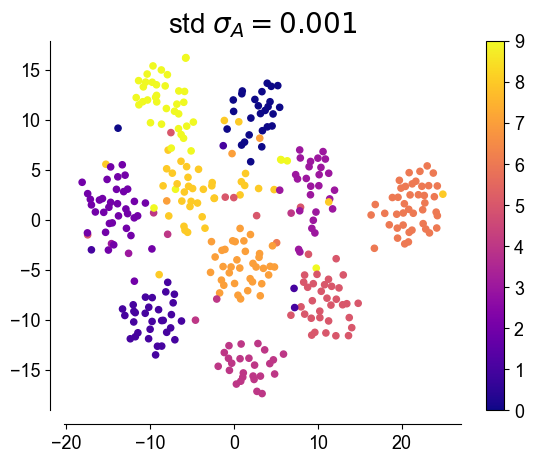

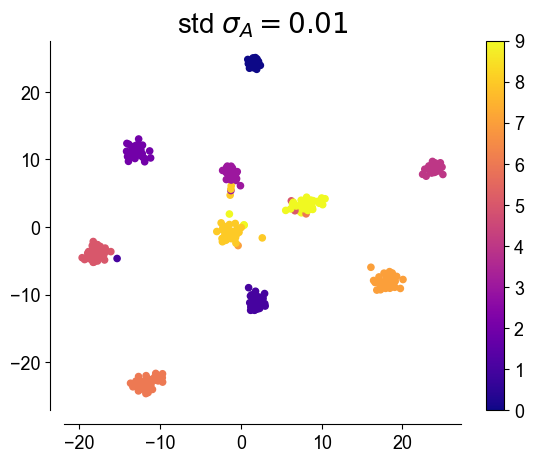

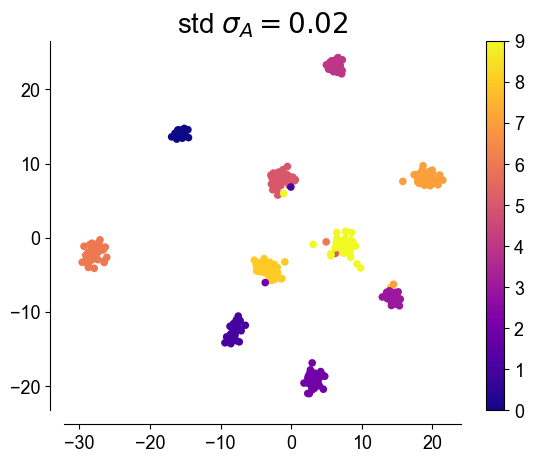

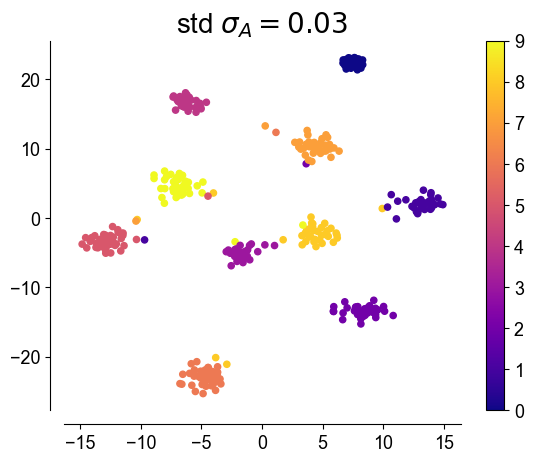

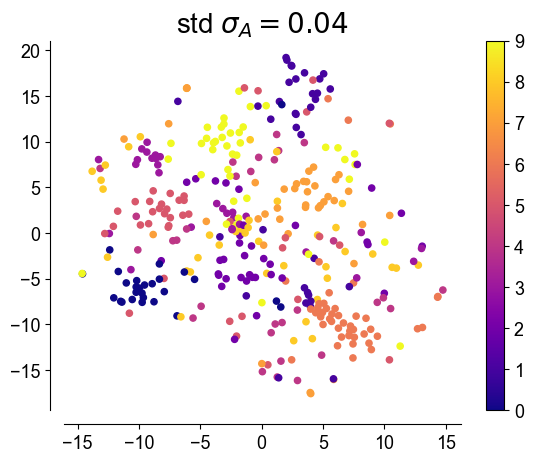

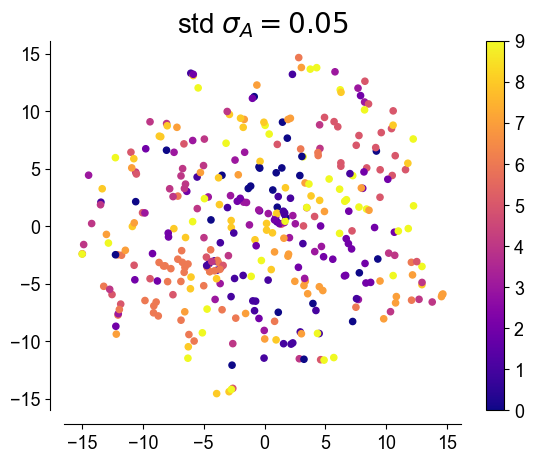

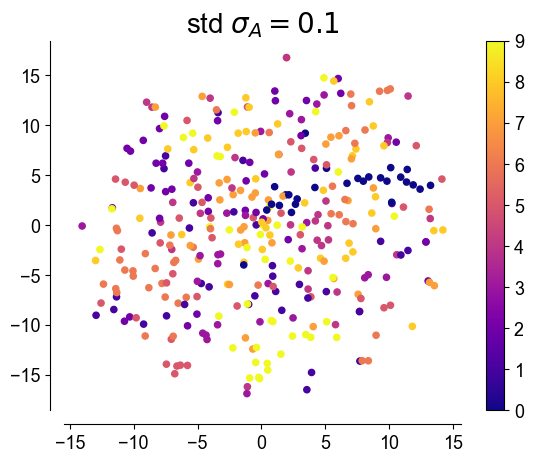

In [10]:
import matplotlib.cm as cm
bond = 100
stds = [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1]
seed = 0
for std in stds:
    model_file = f'results/training_model/{bond}_{std}_{seed}.pickle'
    with open(model_file, 'rb') as file:
        elm = pickle.load(file)
    y_predict = elm.predict(x_test).cpu()
    y_label = y_test.argmax(axis = 1)

    tsne = TSNE(n_components=2, random_state=42)
    compressed_data = tsne.fit_transform(y_predict)
    plt.figure()
    plt.title(f'std $\sigma_A={std}$', size=20)
    plt.scatter(compressed_data[:, 0], compressed_data[:, 1], c = y_label, s = 20, cmap='plasma')
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=13)
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.tick_params(labelsize=13)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['bottom'].set_position(('outward', 10))
    plt.gca().spines['left'].set_position(('outward', 10))


# UMAP

## UMAP ($\chi = 10$)

2024-07-10 11:25:47,649 - elm_mps - INFO - predict
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
2024-07-10 11:25:54,498 - elm_mps - INFO - predict
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
2024-07-10 11:25:55,714 - elm_mps - INFO - predict
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
2024-07-10 11:25:57,154 - elm_mps - INFO - pre

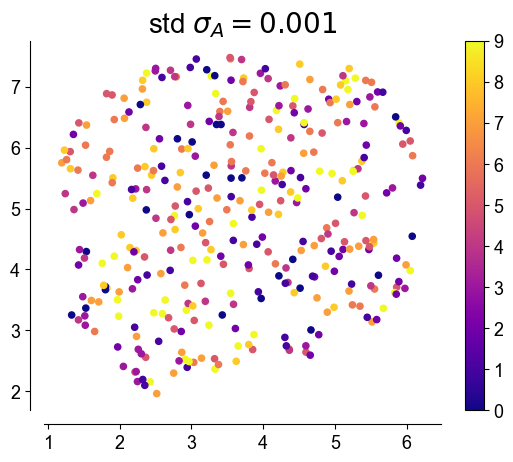

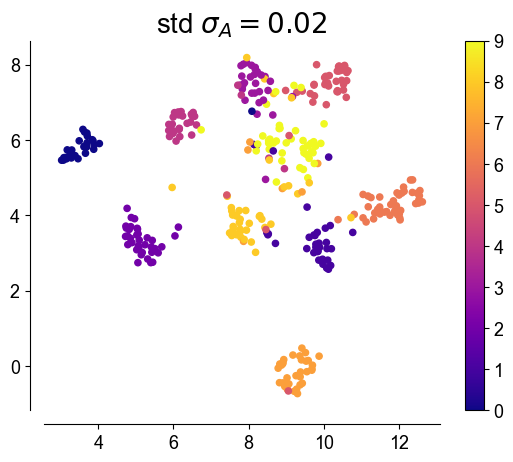

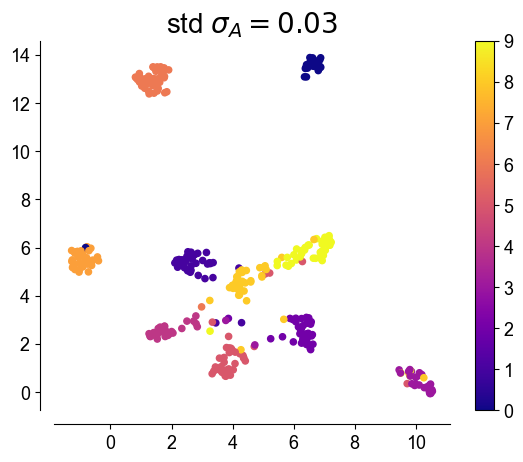

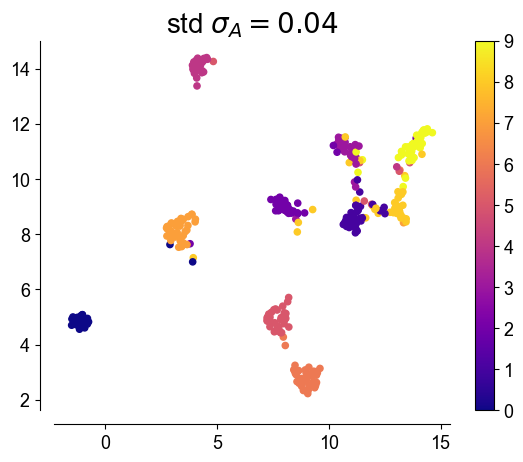

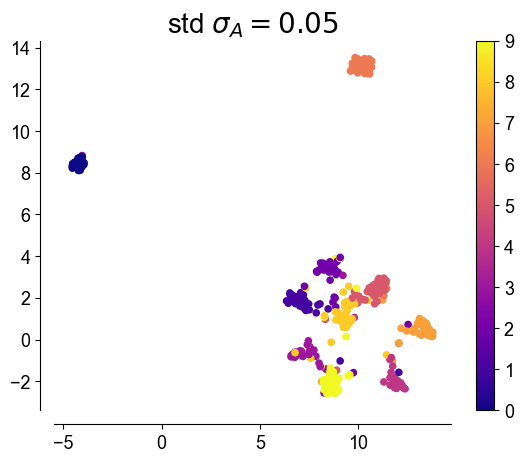

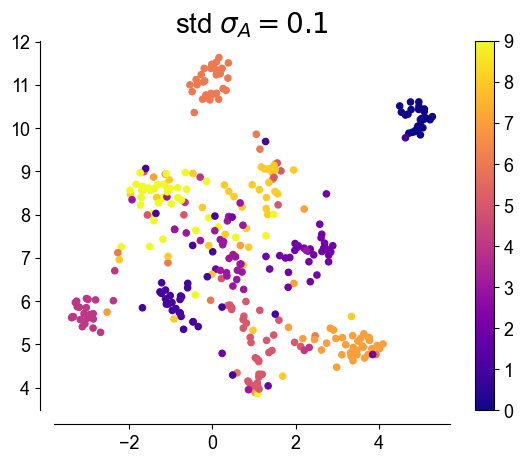

In [11]:
import matplotlib.cm as cm
import umap

bond = 10
stds = [0.001, 0.02, 0.03, 0.04, 0.05, 0.1]
seed = 0
for std in stds:
    model_file = f'results/training_model/{bond}_{std}_{seed}.pickle'
    with open(model_file, 'rb') as file:
        elm = pickle.load(file)
    y_predict = elm.predict(x_test).cpu()
    y_label = y_test.argmax(axis = 1)

    umaper = umap.UMAP(n_components=2, random_state=42)
    compressed_data = umaper.fit_transform(y_predict)
    plt.figure()
    plt.title(f'std $\sigma_A={std}$', size=20)
    plt.scatter(compressed_data[:, 0], compressed_data[:, 1], c = y_label, s = 20, cmap='plasma')

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=13)
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.tick_params(labelsize=13)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['bottom'].set_position(('outward', 10))
    plt.gca().spines['left'].set_position(('outward', 10))

2024-07-11 04:15:35,438 - elm_mps - INFO - predict
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
2024-07-11 04:15:36,965 - elm_mps - INFO - predict
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
2024-07-11 04:15:38,230 - elm_mps - INFO - predict
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
2024-07-11 04:15:39,423 - elm_mps - INFO - pre

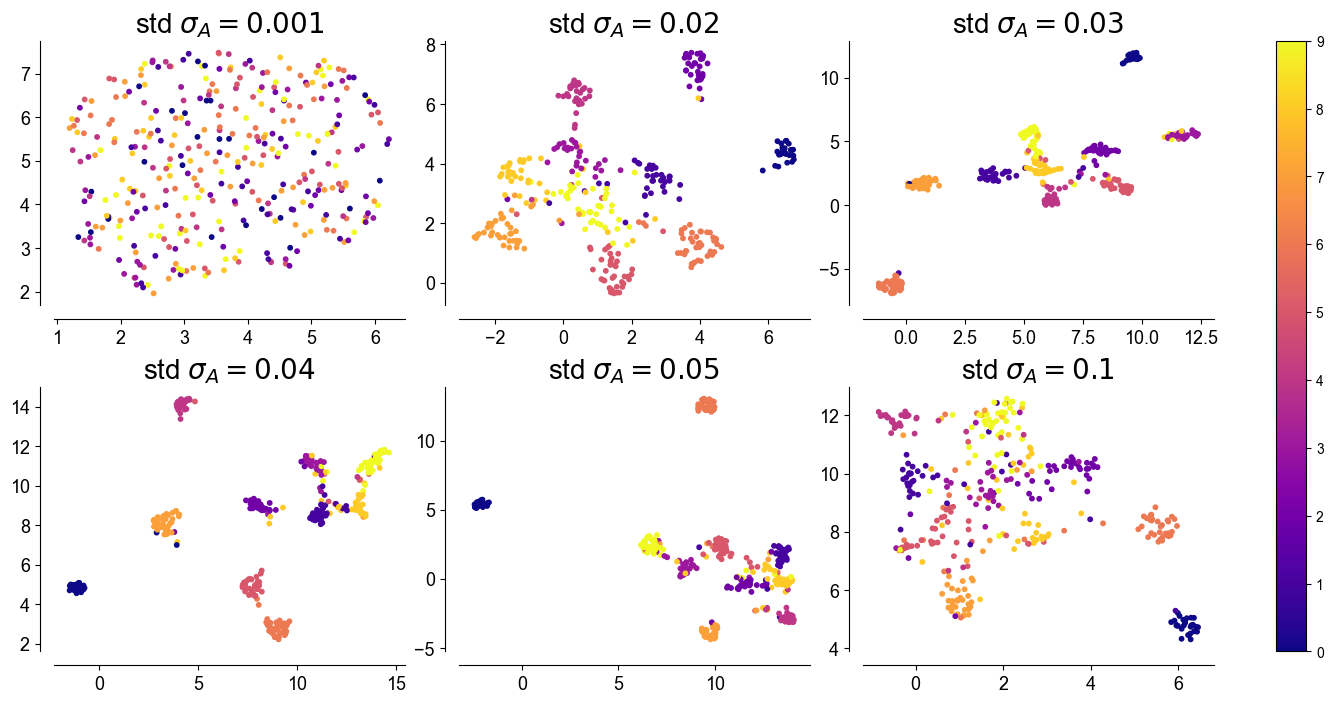

In [33]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import umap
import matplotlib as mpl
import pickle
from matplotlib.gridspec import GridSpec

bond = 10
stds = [0.001, 0.02, 0.03, 0.04, 0.05, 0.1]
seed = 0

fig = plt.figure(figsize=(13.25, 6.92), constrained_layout=True)
gs = GridSpec(2, 3, figure=fig)

plt.rcParams['font.family'] = ['Arial']

axes = []
for cnt in range(6):
    i = cnt // 3
    j = cnt % 3
    axes.append(fig.add_subplot(gs[i, j]))

for cnt, std in enumerate(stds):
    ax = axes[cnt]
    model_file = f'results/training_model/{bond}_{std}_{seed}.pickle'
    with open(model_file, 'rb') as file:
        elm = pickle.load(file)
    y_predict = elm.predict(x_test).cpu()
    y_label = y_test.argmax(axis=1)

    umaper = umap.UMAP(n_components=2, random_state=42)
    compressed_data = umaper.fit_transform(y_predict)

    ax.set_title(f'std $\sigma_A={std}$', size=20)
    scatter = ax.scatter(compressed_data[:, 0], compressed_data[:, 1], c=y_label, s=10, cmap='plasma')

    ax.tick_params(labelsize=13)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_position(('outward', 10))
    ax.spines['left'].set_position(('outward', 10))

norm = mpl.colors.Normalize(vmin=0, vmax=9)
mappable = cm.ScalarMappable(cmap='plasma', norm=norm)
fig.colorbar(mappable, ax=axes)

fig.savefig('results/figure/figure_3_a.pdf')


## UMAP ($\chi = 100$)

2024-07-10 11:26:12,071 - elm_mps - INFO - predict


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
2024-07-10 11:26:13,412 - elm_mps - INFO - predict
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
2024-07-10 11:26:14,803 - elm_mps - INFO - predict
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
2024-07-10 11:26:16,404 - elm_mps - INFO - predict
/usr/local/lib/python3.10/dist-packages/umap/u

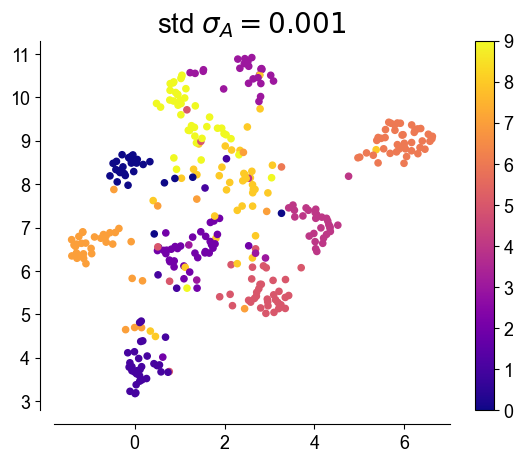

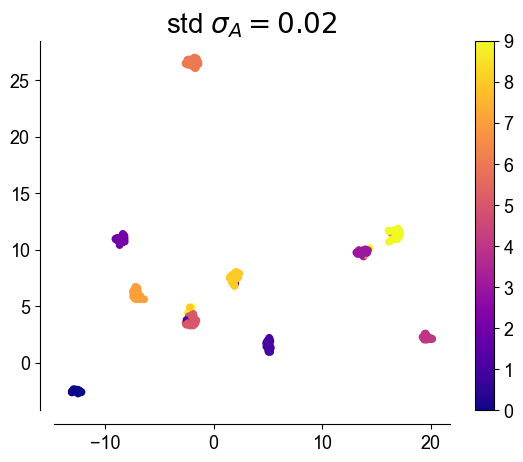

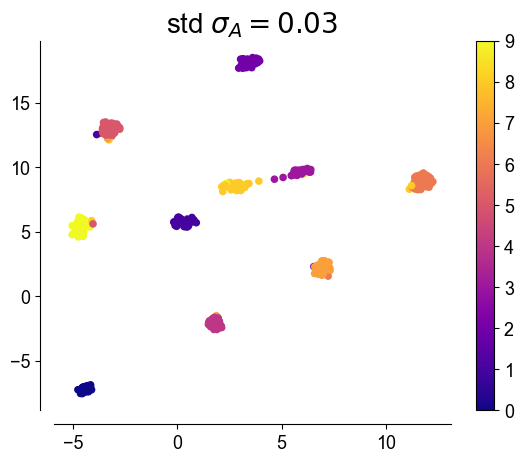

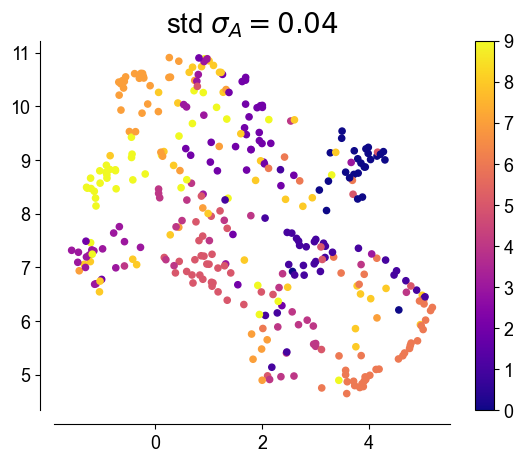

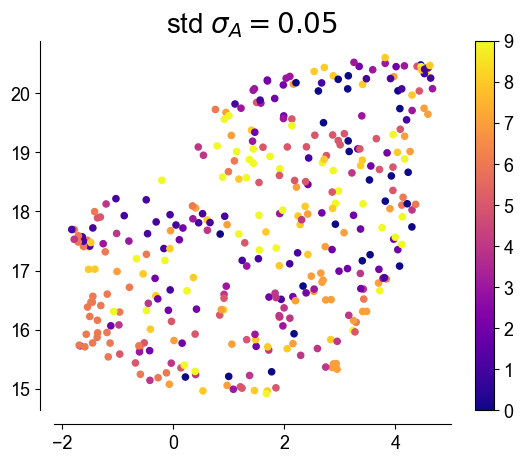

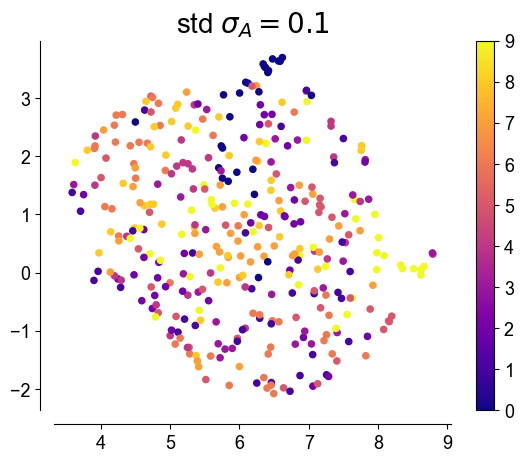

In [13]:
import matplotlib.cm as cm
import umap

bond = 100
stds = [0.001, 0.02, 0.03, 0.04, 0.05, 0.1]
seed = 0
for std in stds:
    model_file = f'results/training_model/{bond}_{std}_{seed}.pickle'
    with open(model_file, 'rb') as file:
        elm = pickle.load(file)
    y_predict = elm.predict(x_test).cpu()
    y_label = y_test.argmax(axis = 1)

    umaper = umap.UMAP(n_components=2, random_state=42)
    compressed_data = umaper.fit_transform(y_predict)
    plt.figure()
    plt.title(f'std $\sigma_A={std}$', size=20)
    plt.scatter(compressed_data[:, 0], compressed_data[:, 1], c = y_label, s = 20, cmap='plasma')
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=13)
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.tick_params(labelsize=13)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['bottom'].set_position(('outward', 10))
    plt.gca().spines['left'].set_position(('outward', 10))

2024-07-11 04:17:07,301 - elm_mps - INFO - predict
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
2024-07-11 04:17:08,686 - elm_mps - INFO - predict
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
2024-07-11 04:17:10,024 - elm_mps - INFO - predict
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
2024-07-11 04:17:11,634 - elm_mps - INFO - pre

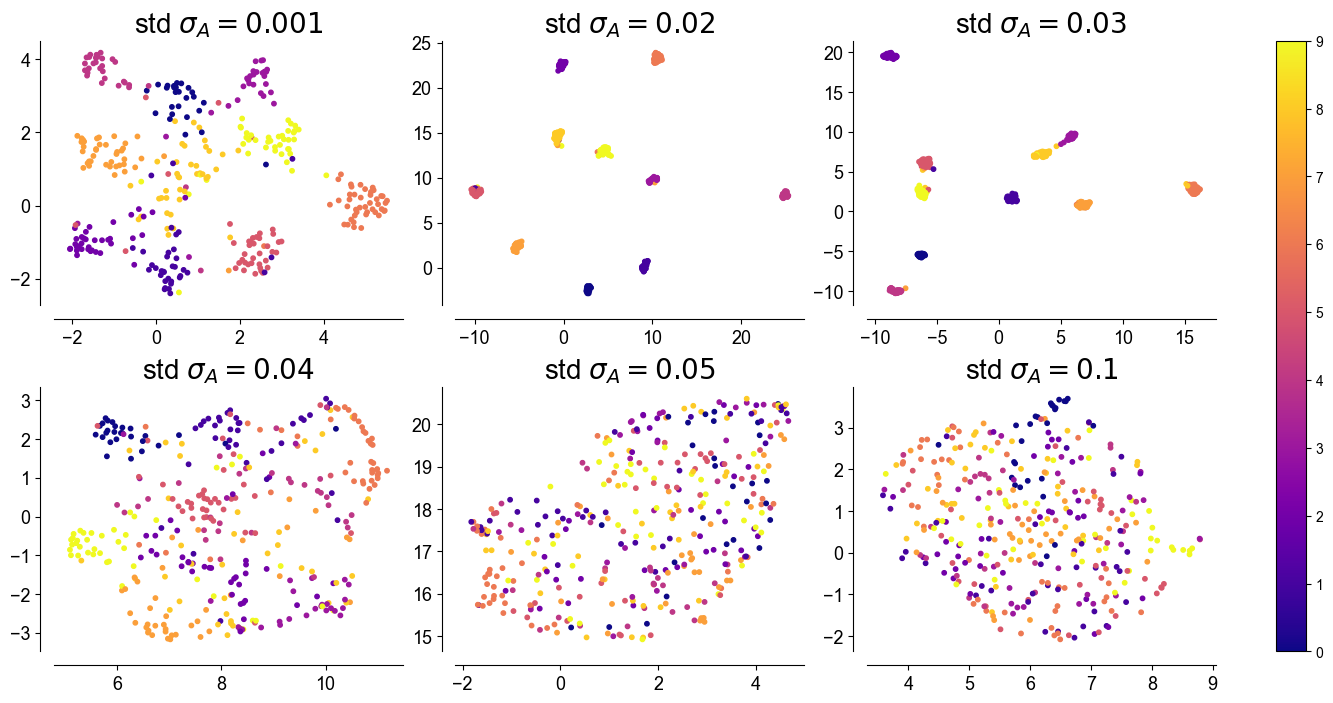

In [34]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import umap
import matplotlib as mpl
import pickle
from matplotlib.gridspec import GridSpec

bond = 100
stds = [0.001, 0.02, 0.03, 0.04, 0.05, 0.1]
seed = 0

fig = plt.figure(figsize=(13.25, 6.92), constrained_layout=True)
gs = GridSpec(2, 3, figure=fig)

plt.rcParams['font.family'] = ['Arial']

axes = []
for cnt in range(6):
    i = cnt // 3
    j = cnt % 3
    axes.append(fig.add_subplot(gs[i, j]))

for cnt, std in enumerate(stds):
    ax = axes[cnt]
    model_file = f'results/training_model/{bond}_{std}_{seed}.pickle'
    with open(model_file, 'rb') as file:
        elm = pickle.load(file)
    y_predict = elm.predict(x_test).cpu()
    y_label = y_test.argmax(axis=1)

    umaper = umap.UMAP(n_components=2, random_state=42)
    compressed_data = umaper.fit_transform(y_predict)

    ax.set_title(f'std $\sigma_A={std}$', size=20)
    scatter = ax.scatter(compressed_data[:, 0], compressed_data[:, 1], c=y_label, s=10, cmap='plasma')

    ax.tick_params(labelsize=13)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_position(('outward', 10))
    ax.spines['left'].set_position(('outward', 10))

norm = mpl.colors.Normalize(vmin=0, vmax=9)
mappable = cm.ScalarMappable(cmap='plasma', norm=norm)
fig.colorbar(mappable, ax=axes)

fig.savefig('results/figure/figure_3_b.pdf')